In [4]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
# Sources
# https://github.com/matthewfdaniels/scripts/blob/graphs/meta_data7.csv
# https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv

In [4]:
meta_data = pd.read_csv('meta_data7.csv')
character_list = pd.read_csv('character_list5.csv')

In [5]:
meta_data.drop('lines_data', axis=1, inplace=True)

In [6]:
character_list.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [7]:
# Saving IMDB Ids as pkl
meta_data['imdb_id'].to_pickle('data/imdbid.pkl')

In [8]:
# Reshaping data
character_words = character_list.groupby(['script_id', 'gender']).sum().reset_index()
words_by_gender = character_words.pivot(index = 'script_id', columns = 'gender', values  = 'words').reset_index()

In [9]:
# Dropping n/as
words_by_gender.drop('?', axis = 1, inplace = True)
words_by_gender.dropna(axis = 0, inplace = True)

In [10]:
polygraph = pd.merge(words_by_gender, meta_data, on = 'script_id')

In [11]:
# Exploring the data
polygraph['total_lines'] = polygraph['f'] + polygraph['m']
polygraph['ratio'] = polygraph['f'] / polygraph['total_lines']

In [12]:
polygraph.to_pickle('data/polygraph.pkl')

## Load Pickle Point

In [6]:
polygraph = pd.read_pickle('data/polygraph.pkl')

## Visualizations

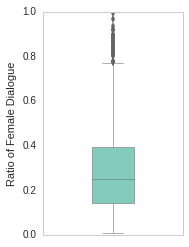

In [7]:
fig, axes = plt.subplots(figsize=(2.5,4))

sns.boxplot(y = polygraph['ratio'], color = '#76D7C4', width = 0.3, linewidth=0.5)
axes.set_ylabel('Ratio of Female Dialogue');

plt.savefig('ratio.png', dpi = 300, bbox_inches = 'tight')

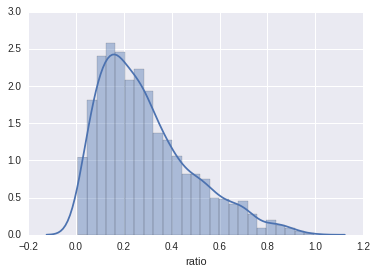

In [18]:
sns.distplot(polygraph['ratio'])